In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple
from collections import deque
from tabulate import tabulate

# Binomial case

## Matrix generation

In [3]:
k = 10
p = 0.7

def generate_matrix(p: int, k: int) -> np.array:
    return np.random.binomial(1, p, size=(k, k))

In [4]:
matrix = generate_matrix(p=p, k=k)
matrix

array([[1, 1, 0, 0, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 1, 1, 1]])

In [5]:
def find_longest_sequence(matrix: np.array, start: Tuple[int]) -> int:
    max_len = 0
    rows, cols = matrix.shape
    queue = deque([(start[0], start[1], 1)])
    visited = set([(start[0], start[1])])
    while queue:
        i, j, length = queue.popleft()
        max_len = max(max_len, length)
        for x, y in [(i+1,j),(i,j+1)]:
            if x < rows and y < cols and matrix[x][y] == 1 and (x, y) not in visited:
                visited.add((x, y))
                queue.append((x, y, length+1))
    return max_len

In [6]:
start = (0, 0)

find_longest_sequence(matrix, start)

2

In [7]:
def generate_expected_values(matrix: np.array) -> np.array:
    shape = matrix.shape[0]
    expected_matrix = np.zeros_like(matrix, dtype=float)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            expected_matrix[i,j] = find_longest_sequence(matrix, (i, j)) / shape
    return expected_matrix

In [8]:
expected_matrix = generate_expected_values(matrix)
expected_matrix

array([[0.2, 0.1, 0.1, 0.4, 0.3, 0.1, 0.8, 0.7, 0.6, 0.4],
       [1.8, 1.7, 0.4, 0.3, 0.2, 0.1, 0.7, 0.6, 0.5, 0.3],
       [1.7, 1.6, 0.3, 0.2, 0.1, 1.2, 1.1, 0.5, 0.4, 0.2],
       [1.6, 1.5, 0.1, 0.1, 1.2, 1.1, 1. , 0.9, 0.3, 0.1],
       [1.5, 1.4, 1.3, 1.2, 1.1, 1. , 0.9, 0.8, 0.2, 0.1],
       [1.4, 1.3, 1.2, 1.1, 1. , 0.9, 0.8, 0.7, 0.1, 0.5],
       [0.6, 0.2, 1.1, 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4],
       [0.5, 0.1, 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3],
       [0.4, 0.5, 0.4, 0.3, 0.2, 0.6, 0.5, 0.4, 0.3, 0.2],
       [0.3, 0.2, 0.1, 0.2, 0.1, 0.1, 0.4, 0.3, 0.2, 0.1]])

In [9]:
def generate_expected_volume(expected_matrix: np.array) -> float:
    return np.mean(expected_matrix) 

In [10]:
generate_expected_volume(expected_matrix)

0.624

In [17]:
def simmulation(n: int, p: float, k: int):
    expected_matrix_sum = None
    expected_volume_sum = 0
    trace_expected_volume = np.zeros(n)
    
    for i in range(n):
        matrix = generate_matrix(p=p, k=k)
        expected_matrix = generate_expected_values(matrix)
        expected_volume = generate_expected_volume(expected_matrix)
        
        if i == 0:
            expected_matrix_sum = np.zeros_like(matrix, dtype=float)
            
        expected_matrix_sum += expected_matrix
        expected_volume_sum += expected_volume
        trace_expected_volume[i] = expected_volume
    
        if i%100 == 0:
            print(f"{i} iteration")
    
    return expected_matrix_sum / n, expected_volume_sum / n, trace_expected_volume.std()

In [91]:
k = 8
p = 0.5
n = 10_000

expected_matrix, expected_volume, volume_std = simmulation(n, p, k)

0 iteration
500 iteration
1000 iteration
1500 iteration
2000 iteration
2500 iteration
3000 iteration
3500 iteration
4000 iteration
4500 iteration
5000 iteration
5500 iteration
6000 iteration
6500 iteration
7000 iteration
7500 iteration
8000 iteration
8500 iteration
9000 iteration
9500 iteration


In [92]:
expected_matrix

array([[1.8332375, 1.7118125, 1.589975 , 1.4632875, 1.335025 , 1.1926625,
        1.0096875, 0.704625 ],
       [1.71025  , 1.590375 , 1.4641125, 1.3399875, 1.214575 , 1.0775   ,
        0.9099875, 0.6445875],
       [1.5889875, 1.4662125, 1.341025 , 1.2184125, 1.092125 , 0.9603375,
        0.809425 , 0.5789375],
       [1.4642375, 1.3382625, 1.2204875, 1.094225 , 0.9698125, 0.8434375,
        0.7047125, 0.5061625],
       [1.3334125, 1.214425 , 1.0936625, 0.9706375, 0.8478125, 0.7238375,
        0.593    , 0.425475 ],
       [1.19295  , 1.0783625, 0.9609   , 0.8433   , 0.72455  , 0.6025375,
        0.478075 , 0.3368875],
       [1.0151375, 0.9173875, 0.8134875, 0.706275 , 0.59495  , 0.479125 ,
        0.3592875, 0.2370125],
       [0.7135   , 0.6509625, 0.5859375, 0.512875 , 0.431375 , 0.3396375,
        0.2370125, 0.125    ]])

In [93]:
expected_volume

0.939488671875

In [94]:
volume_std

0.05871167393786089

### P increase

In [19]:
p = [i/10 for i in range(1,10)]
k = 35
n = 500

results = []

for i in p:
    expected_matrix, expected_volume, volume_std = simmulation(n, i, k)
    results.append((expected_volume, volume_std))

0 iteration
100 iteration
200 iteration
300 iteration
400 iteration
0 iteration
100 iteration
200 iteration
300 iteration
400 iteration
0 iteration
100 iteration
200 iteration
300 iteration
400 iteration
0 iteration
100 iteration
200 iteration
300 iteration
400 iteration
0 iteration
100 iteration
200 iteration
300 iteration
400 iteration
0 iteration
100 iteration
200 iteration
300 iteration
400 iteration
0 iteration
100 iteration
200 iteration
300 iteration
400 iteration
0 iteration
100 iteration
200 iteration
300 iteration
400 iteration
0 iteration
100 iteration
200 iteration
300 iteration
400 iteration


In [20]:
df = pd.DataFrame(results, columns=['expected volume', 'std'], index=p)
df

,expected volume,std
0.1,0.035042,0.000735
0.2,0.044355,0.001524
0.3,0.058661,0.003216
0.4,0.082656,0.006835
0.5,0.131943,0.017203
0.6,0.252181,0.048340
0.7,0.531831,0.083351
0.8,0.814380,0.042877
0.9,0.942409,0.020426


Text(0.5, 1.0, 'Results')

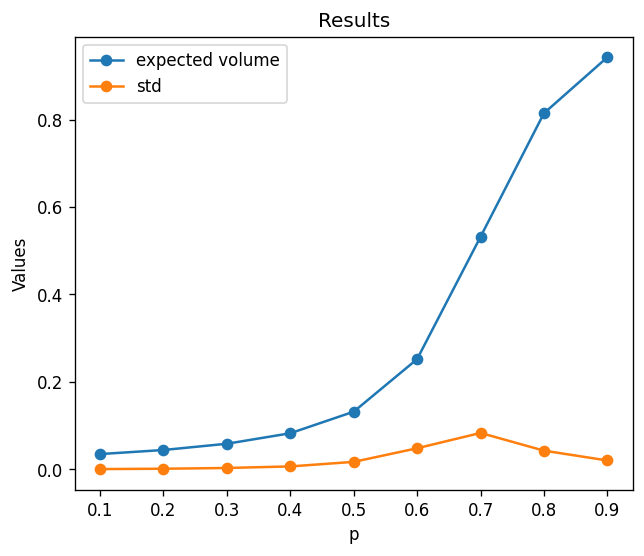

In [21]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=120)
df.plot(kind='line', marker='o', ax=ax)

ax.set_xlabel('p')
ax.set_ylabel('Values')
ax.set_title('Results')

### K increase

In [99]:
p = 0.5
n = 1_000

results = []

for i in range(20, 51):
    expected_matrix, expected_volume, volume_std = simmulation(n, p, i)
    results.append((expected_volume, volume_std))

0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration
0 iteration
500 iteration


In [104]:
df = pd.DataFrame(results, columns=['expected volume', 'std'], index=[i for i in range(20, 51)])
df['std/volume ratio'] = df['std'] / df['expected volume']
df

,expected volume,std,std/volume ratio
20,0.209742,0.038469,0.183411
21,0.201437,0.035473,0.176100
22,0.194327,0.033164,0.170662
23,0.187779,0.032055,0.170704
24,0.181185,0.030141,0.166356
25,0.176278,0.028849,0.163657
26,0.170888,0.027190,0.159112
27,0.164463,0.025936,0.157698
28,0.159741,0.023633,0.147944
29,0.155058,0.023735,0.153069


Text(0.5, 1.0, 'Results')

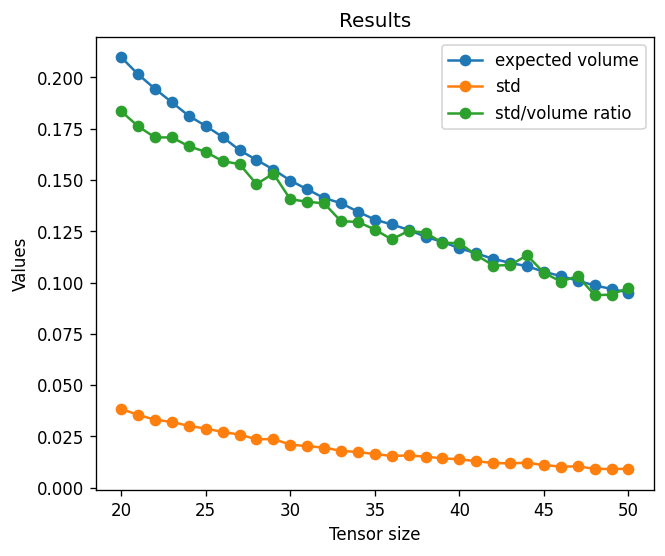

In [112]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=120)
df.plot(kind='line', marker='o', ax=ax)

ax.set_xlabel('Tensor size')
ax.set_ylabel('Values')
ax.set_title('Results')

In [95]:
result = tabulate(expected_matrix, tablefmt="latex")
print(result)

\begin{tabular}{rrrrrrrr}
\hline
 1.83324 & 1.71181  & 1.58997  & 1.46329  & 1.33502  & 1.19266  & 1.00969  & 0.704625 \\
 1.71025 & 1.59038  & 1.46411  & 1.33999  & 1.21457  & 1.0775   & 0.909987 & 0.644587 \\
 1.58899 & 1.46621  & 1.34102  & 1.21841  & 1.09213  & 0.960337 & 0.809425 & 0.578937 \\
 1.46424 & 1.33826  & 1.22049  & 1.09423  & 0.969812 & 0.843437 & 0.704712 & 0.506162 \\
 1.33341 & 1.21443  & 1.09366  & 0.970638 & 0.847812 & 0.723838 & 0.593    & 0.425475 \\
 1.19295 & 1.07836  & 0.9609   & 0.8433   & 0.72455  & 0.602537 & 0.478075 & 0.336888 \\
 1.01514 & 0.917388 & 0.813488 & 0.706275 & 0.59495  & 0.479125 & 0.359287 & 0.237012 \\
 0.7135  & 0.650962 & 0.585938 & 0.512875 & 0.431375 & 0.339637 & 0.237012 & 0.125    \\
\hline
\end{tabular}
